In [1]:
import torch
import torch.nn as nn
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
x = torch.tensor(3.0, requires_grad=True)

In [3]:
y = torch.tensor(4.0, requires_grad=True)

In [4]:
z = x * y

In [5]:
z

tensor(12.)

In [6]:
x.grad

In [7]:
y.grad

In [8]:
z.backward()

In [9]:
x.grad

tensor(4.)

In [10]:
y.grad

tensor(3.)

## Back Propagation Diagram

$$ f(w,x) = {  \frac{1}{  e^{-w*x} } }  $$

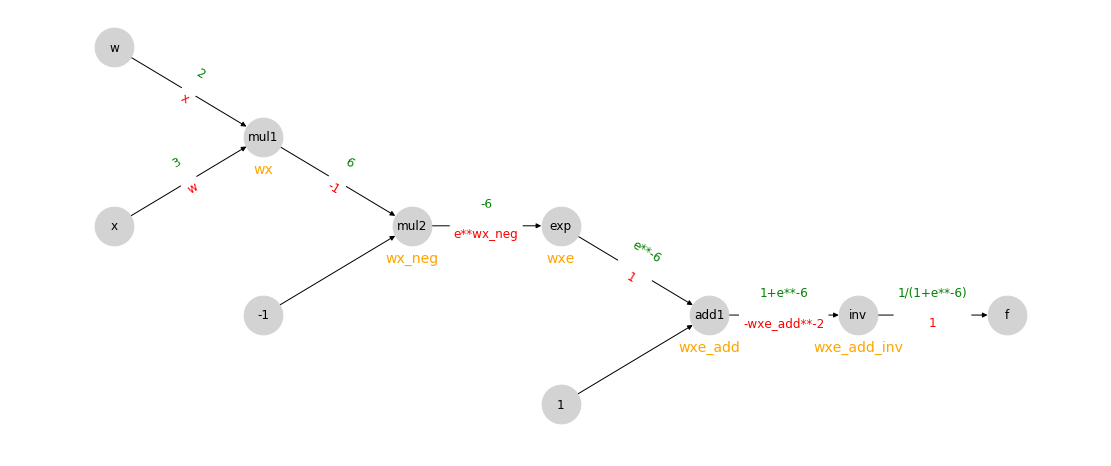

In [13]:
import networkx as nx
import matplotlib.pyplot as plt

G = nx.DiGraph()
G.add_nodes_from(['-1', '1', 'w','x','mul1','mul2', 'add1','exp', 'inv', 'f'])
G.add_edge('w','mul1')
G.add_edge('x','mul1')
G.add_edge('mul1','mul2')
G.add_edge('-1','mul2')
G.add_edge('mul1','mul2')
G.add_edge('mul2','exp')
G.add_edge('exp','add1')
G.add_edge('1','add1')
G.add_edge('add1','inv')
G.add_edge('inv','f')

fixed_positions = {'w':(0,4),'x':(0,2), 'mul1':(1,3), 'mul2':(2,2), '-1':(1,1), 
                   'exp':(3,2), '1':(3,0), 'add1':(4,1), 'inv':(5,1), 'f':(6,1)}
fixed_nodes = fixed_positions.keys()
pos = nx.spring_layout(G, pos=fixed_positions, fixed = fixed_nodes)
plt.figure(3,figsize=(15,6)) 
nx.draw(G,pos,with_labels=True, node_size = 1500, node_color = 'lightgrey')
nx.draw_networkx_edge_labels(G,pos,
    {},
    font_color='red'                     
)
node_labels = {'mul1':'wx', 'mul2':'wx_neg', 'exp':'wxe', 'add1':'wxe_add', 'inv':'wxe_add_inv'}
node_labels = {k:'\n\n\n\n'+v for k,v in node_labels.items()}
edge_label_forward = {('w','mul1'):"2", 
                         ('x','mul1'):"3",
                         ('mul1','mul2'):"6",
                         ('mul2','exp'):"-6",
                         ('exp','add1'):"e**-6",
                         ('add1','inv'):"1+e**-6",
                         ('inv','f'):"1/(1+e**-6)"}
edge_label_local_grad = {('w','mul1'):"x", 
                         ('x','mul1'):"w",
                         ('mul1','mul2'):"-1",
                         ('mul2','exp'):"e**wx_neg",
                         ('exp','add1'):"1",
                         ('add1','inv'):"-wxe_add**-2",
                         ('inv','f'):"1"}

edge_label_forward = {k: v+'\n\n\n' for k,v in edge_label_forward.items()}
edge_label_local_grad = {k:'\n'+v for k,v in edge_label_local_grad.items()}
nx.draw_networkx_labels(G,pos,node_labels,font_size=14,font_color='orange')
nx.draw_networkx_edge_labels(G, pos, edge_label_forward, font_color='green', font_size=12)
nx.draw_networkx_edge_labels(G, pos, edge_label_local_grad, font_color='red', font_size=12)

#plt.draw()
plt.show()

In [14]:
w = torch.tensor(2.0, requires_grad=True)
x = torch.tensor(-3.0, requires_grad=True)

## Forward Pass

In [15]:
wx = w*x
wx_neg = wx*-1
wxe = torch.exp(wx_neg)
wxe_add = 1 + wxe
wxe_add_inv = 1/wxe_add

## Back propagation

In [16]:
dwxe_add_inv = 1
dwxe_add = -torch.pow(wxe_add,-2) * dwxe_add_inv
dwxe = 1 * dwxe_add
dwx_neg = torch.exp(wx_neg) * dwxe
dwx = -1*dwx_neg
dw = x * dwx
dx = w * dwx

## Check gradients wrt w and x

In [17]:
dw.item()

-0.007399527356028557

In [18]:
dx.item()

0.004933018237352371

## Compare manual gradients with pythorch auto gradients

In [19]:
w = torch.tensor(2.0, requires_grad=True)
x = torch.tensor(-3.0, requires_grad=True)

In [20]:
f = 1/(1+torch.exp(-w*x))

In [21]:
f.backward()

In [22]:
w.grad.item()

-0.007399526424705982

In [23]:
x.grad.item()

0.004933017771691084

## They are the same